### Section 1: Introduction

### Section 2: Exploratory Analysis

### Section 3: Methods

### Section 4: Results & Analysis

### Section 5: Conclusions

### Section 6: Appendix

In [ ]:
# Imports
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# sklearn imports
import sklearn as sk
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline

import itertools

In [2]:
cols = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol", "quality"
]
# Data is semi-colon separated and the header is of the form "fixed acidity;""volatile acidity"";""citric acid"";""residual sugar""; . . . so we need to correct it manually
data = pd.read_csv("winequality-red.csv", sep=";", skiprows=1, header=None, names=cols)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.info()
# Note that all values are numeric (floats or ints). The only "categorical" variable is quality. However, this could also be treated as numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.describe()
# data.duplicated().sum()
# data.shape
# data.columns
# data.dtypes
# data.nunique()
# data.value_counts()
# data.corr()
# data.cov()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data["quality"].unique()
# There are 6 unique values for quality: 3, 4, 5, 6, 7, 8
# This is interesting because quality can take values 1-10, but the dataset only contains 6 values.

array([5, 6, 7, 4, 8, 3])

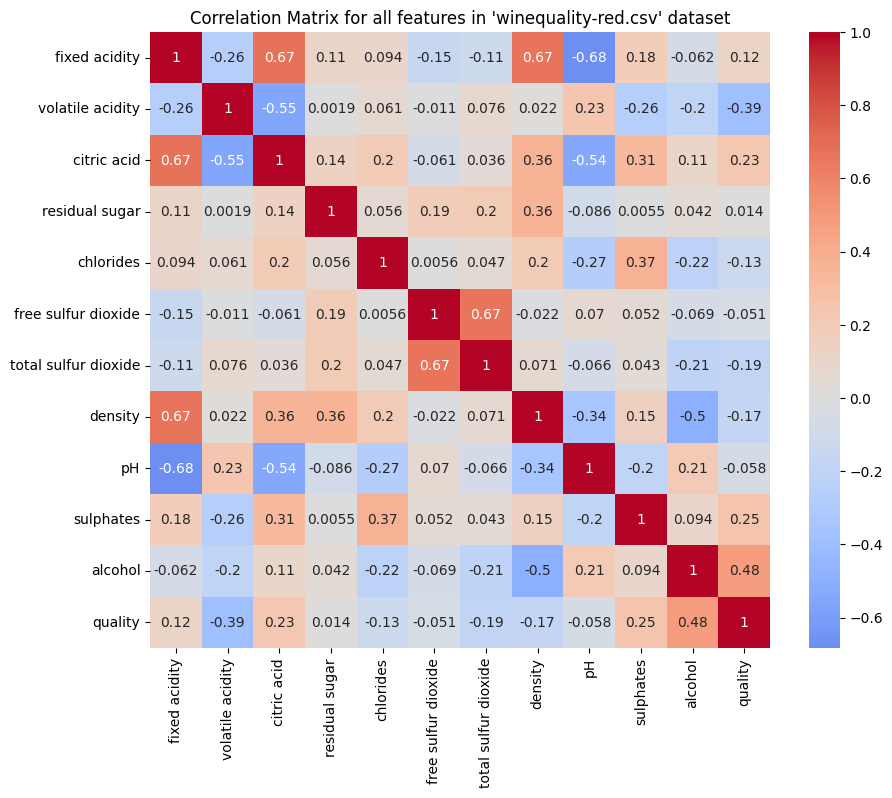

In [6]:
# Correlation matrix
corr = data.corr(numeric_only=True)

# 2. Plot a colored heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,        # show the correlation values
    cmap="coolwarm",   # color scheme ('viridis', 'magma', etc. also work)
    center=0           # center the colormap at 0
)
plt.title("Correlation Matrix for all features in 'winequality-red.csv' dataset")
plt.show()

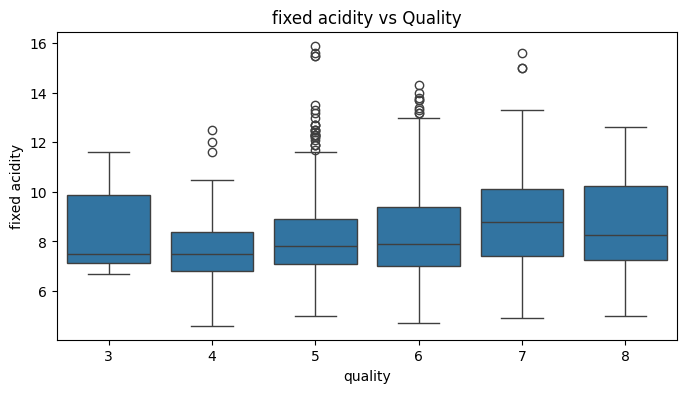

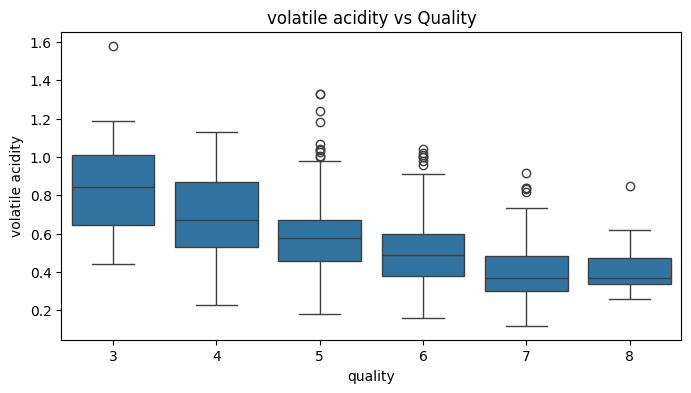

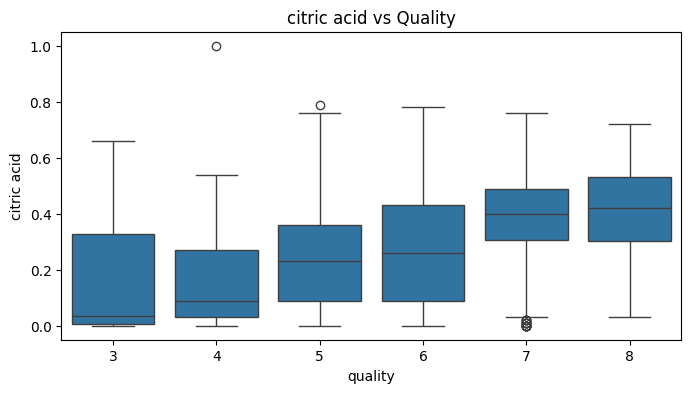

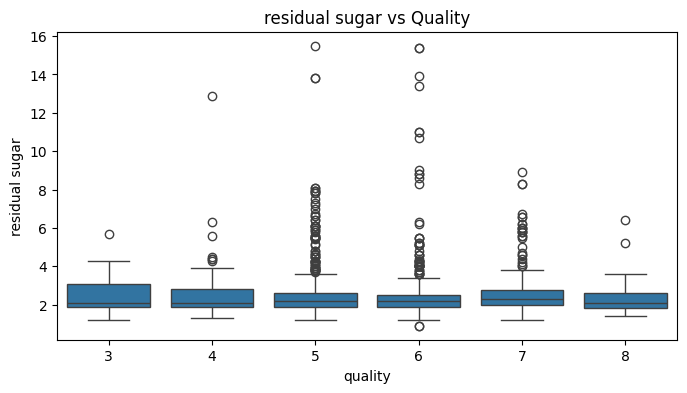

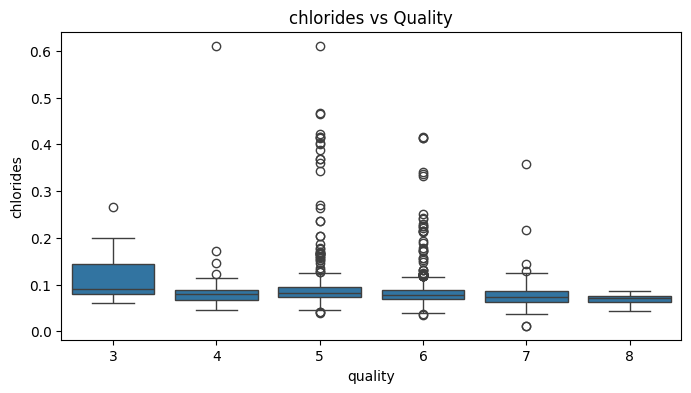

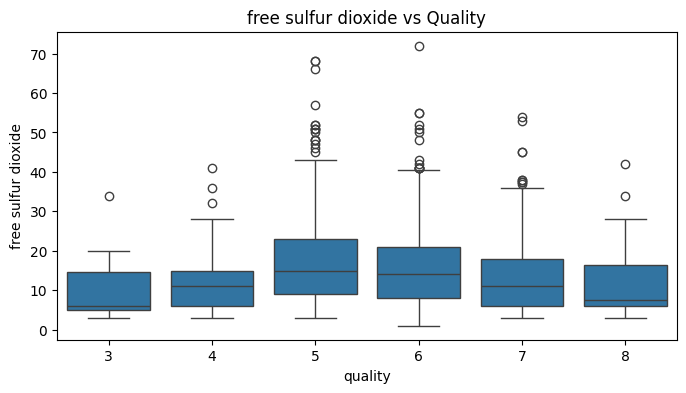

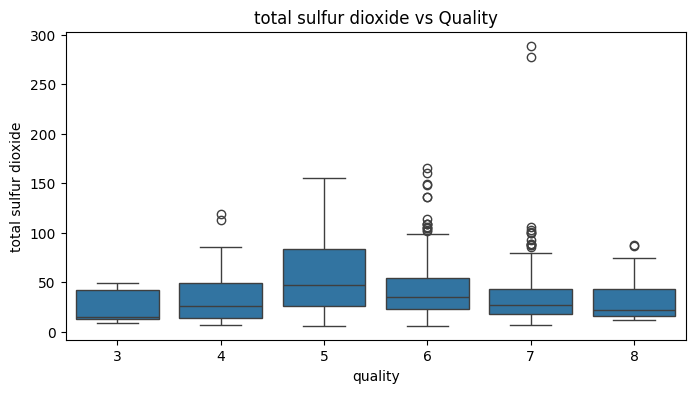

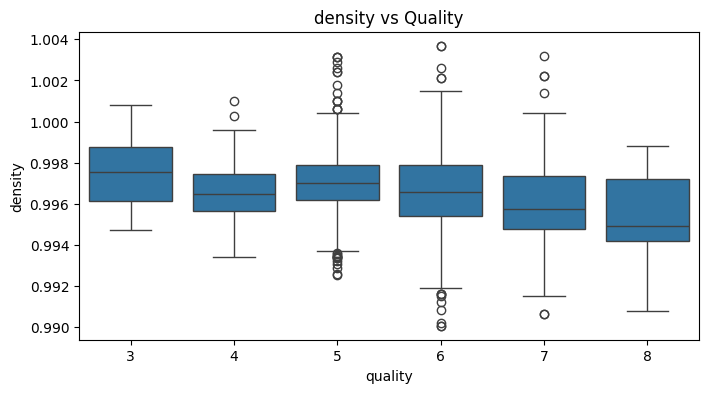

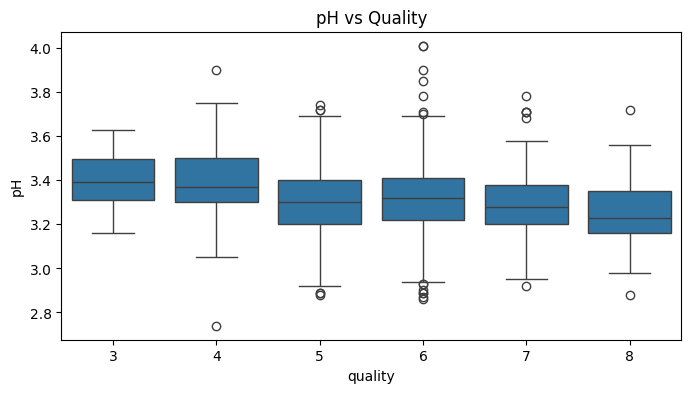

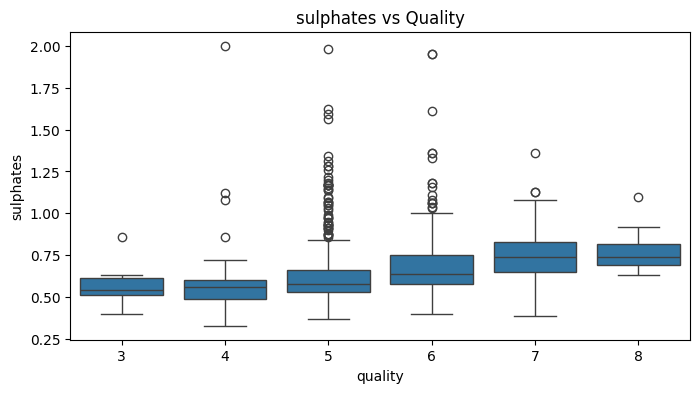

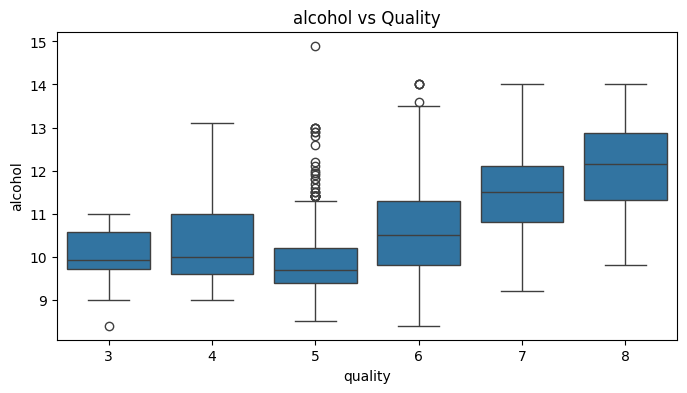

In [7]:
# Boxplots for each feature against quality. Using boxplots as opposed to scatterplots because the latter is not appropriate for categorical data.
for col in data.columns:
    if col != "quality":
        plt.figure(figsize=(8, 4))
        sns.boxplot(x="quality", y=col, data=data)
        plt.title(f"{col} vs Quality")
        plt.show()

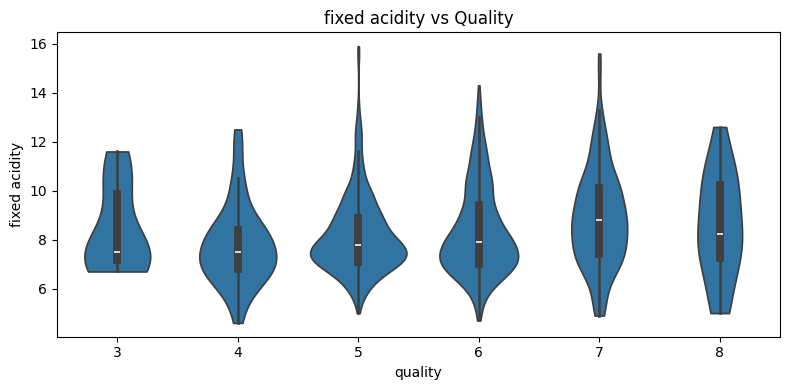

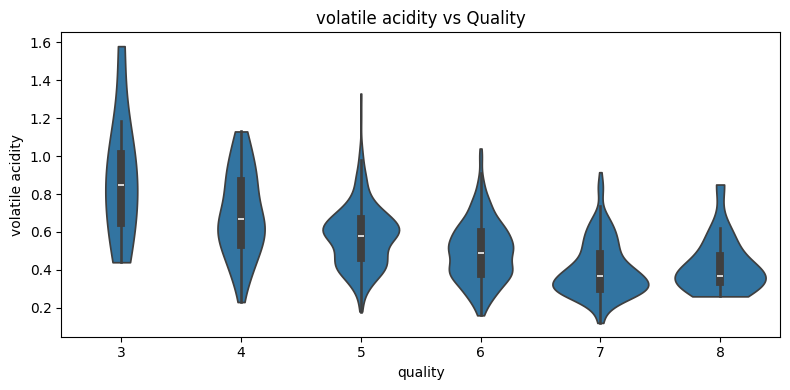

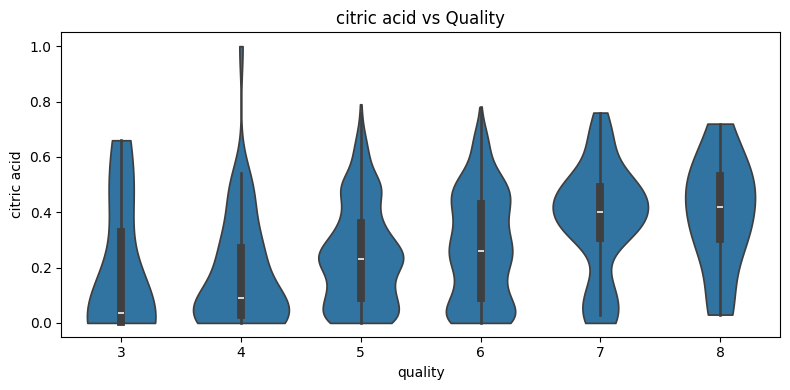

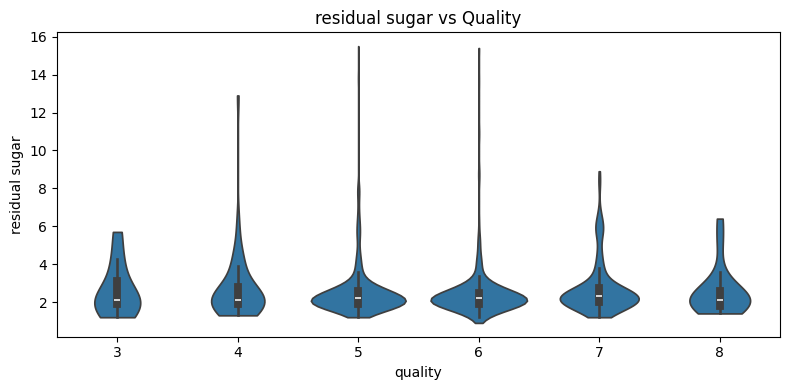

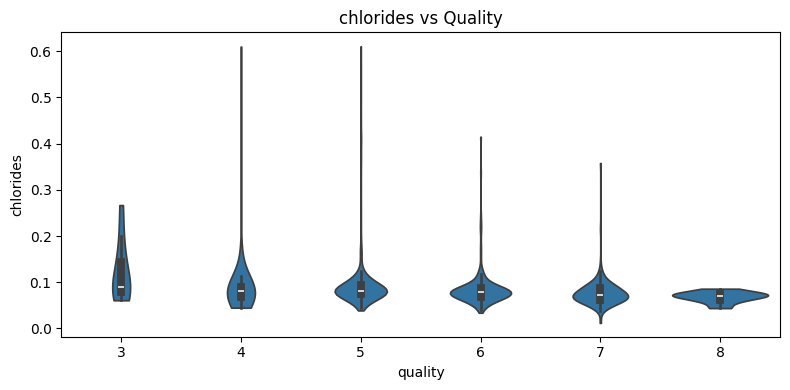

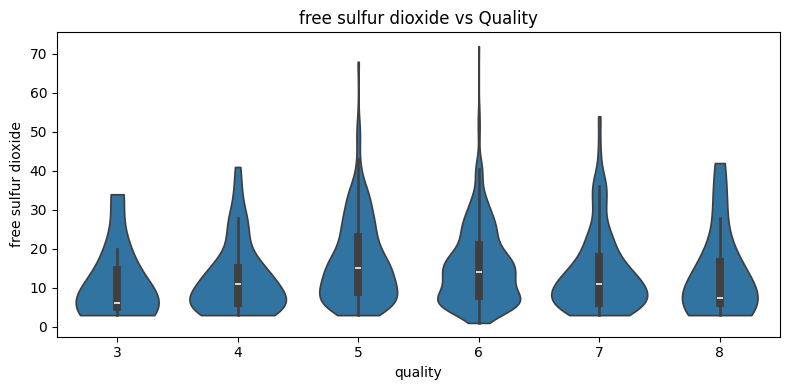

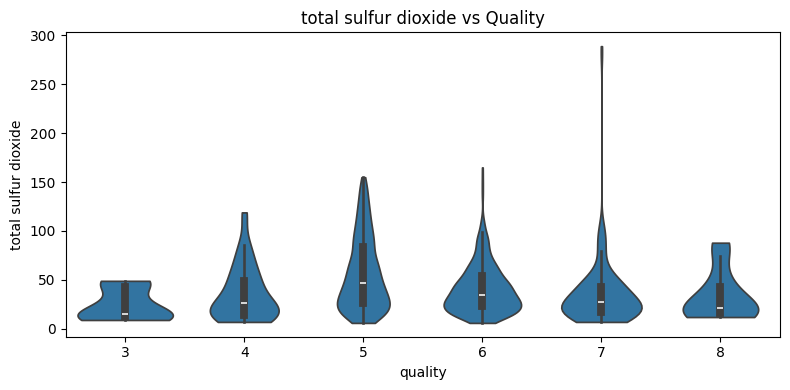

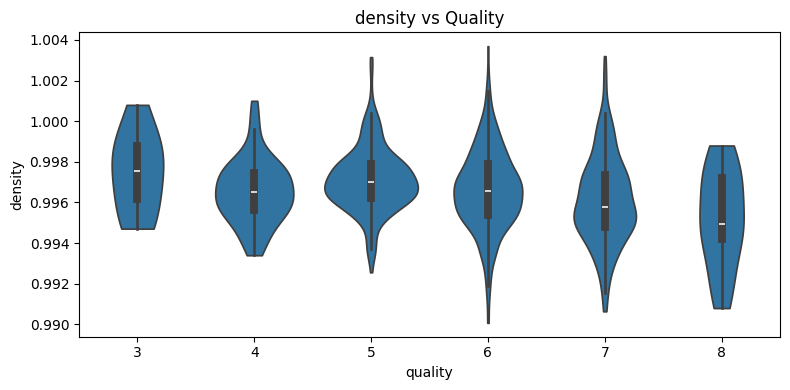

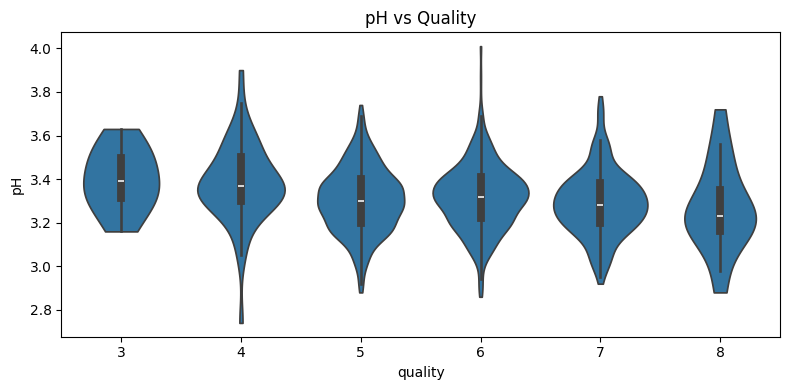

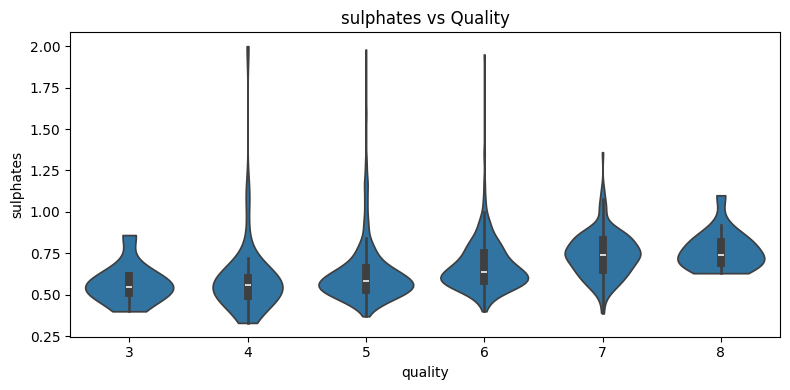

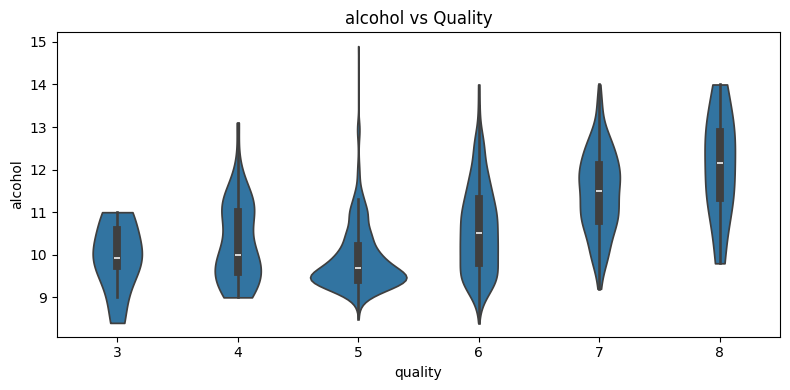

In [8]:
data["quality"] = data["quality"].astype("category")

for col in data.columns:
    if col == "quality":
        continue
    
    plt.figure(figsize=(8, 4))
    sns.violinplot(
        data=data,
        x="quality",
        y=col,
        inner="box",      # shows a mini boxplot inside (optional)
        cut=0             # don't extend beyond data range
    )
    plt.title(f"{col} vs Quality")
    plt.tight_layout()
    plt.show()

In [9]:
# Separating features and target variable
X = data.drop(columns=["quality"])
y = data["quality"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
# Fitting & evaluating the model
model = LinearRegression()
model.fit(X_train, y_train)

r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print("Train R^2:", r2_train)
print("Test R^2:", r2_test)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Printing out equation for linear regression model
intercept = model.intercept_
coeffs = model.coef_
features = X_train.columns

print("Linear Regression Equation:\n")

equation = f"quality = {intercept:.4f}"

for coef, feat in zip(coeffs, features):
    equation += f" + ({coef:.4f} * {feat})"

print(equation)

Train R^2: 0.3479926193529862
Test R^2: 0.4031803412796233
Coefficients: [ 2.30853339e-02 -1.00130443e+00 -1.40821461e-01  6.56431104e-03
 -1.80650315e+00  5.62733439e-03 -3.64444893e-03 -1.03515936e+01
 -3.93687732e-01  8.41171623e-01  2.81889567e-01]
Intercept: 14.355105195762047
Linear Regression Equation:

quality = 14.3551 + (0.0231 * fixed acidity) + (-1.0013 * volatile acidity) + (-0.1408 * citric acid) + (0.0066 * residual sugar) + (-1.8065 * chlorides) + (0.0056 * free sulfur dioxide) + (-0.0036 * total sulfur dioxide) + (-10.3516 * density) + (-0.3937 * pH) + (0.8412 * sulphates) + (0.2819 * alcohol)


In [11]:
# Finding optimal linear regression model given a dataset and target column
def find_best_linear_regression(data, target_col, test_size=0.2, random_state=42):
    """
    Exhaustively searches over all non-empty subsets of features
    to find the linear regression model that maximizes R^2 on the test set.

    Parameters
    ----------
    data : pd.DataFrame
        Full dataset including features and target.
    target_col : str
        Name of the target column (e.g., "quality").
    test_size : float, optional
        Fraction of data to use as the test set.
    random_state : int, optional
        Random state for train_test_split.

    Returns
    -------
    best_model : LinearRegression
        The fitted sklearn LinearRegression model with the best test R^2.
    best_features : list of str
        List of feature names used in the best model.
    best_train_r2 : float
        R^2 on the training set for the best model.
    best_test_r2 : float
        R^2 on the test set for the best model.
    """

    # Split X and y
    X = data.drop(columns=[target_col])
    y = data[target_col]

    # One split only
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    feature_names = X.columns.tolist()
    n_features = len(feature_names)

    best_model = None
    best_features = None
    best_test_r2 = -np.inf
    best_train_r2 = None

    # Iterate over all non-empty subsets of features
    for k in range(1, n_features + 1):
        for subset in itertools.combinations(feature_names, k):
            subset = list(subset)

            X_train_sub = X_train[subset]
            X_test_sub = X_test[subset]

            model = LinearRegression()
            model.fit(X_train_sub, y_train)

            train_r2 = model.score(X_train_sub, y_train)
            test_r2 = model.score(X_test_sub, y_test)

            if test_r2 > best_test_r2:
                best_test_r2 = test_r2
                best_train_r2 = train_r2
                best_model = model
                best_features = subset

    # Print the equation for the best model
    intercept = best_model.intercept_
    coeffs = best_model.coef_

    print("Best feature subset:", best_features)
    print(f"Best train R^2: {best_train_r2:.4f}")
    print(f"Best test  R^2: {best_test_r2:.4f}\n")

    equation = f"{target_col} = {intercept:.4f}"
    for coef, feat in zip(coeffs, best_features):
        sign = " + " if coef >= 0 else " - "
        equation += f"{sign}{abs(coef):.4f} * {feat}"

    print("Best model equation:")
    print(equation)

    return best_model, best_features, best_train_r2, best_test_r2


In [16]:
# assuming `data` is your cleaned DataFrame
best_model, best_feats, best_train_r2, best_test_r2 = find_best_linear_regression(
    data,
    target_col='quality',
    test_size=0.3,
    random_state=42
)

Best feature subset: ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Best train R^2: 0.3601
Best test  R^2: 0.3521

Best model equation:
quality = 18.5533 + 0.0094 * fixed acidity - 0.9879 * volatile acidity + 0.0057 * residual sugar - 1.8705 * chlorides + 0.0052 * free sulfur dioxide - 0.0036 * total sulfur dioxide - 14.7839 * density - 0.3070 * pH + 0.8091 * sulphates + 0.2855 * alcohol


In [ ]:
def find_best_linear_regression_with_transforms(
    data, target_col, test_size=0.2, random_state=42
):
    """
    1) For each feature, tries raw, ln(x), and x^2 (where valid),
       and picks the transform with the best test R^2 in a univariate regression.
    2) Using those chosen transforms (one per original feature), searches
       over all non-empty subsets to find the linear regression model
       that maximizes R^2 on the test set.

    Returns:
        best_model,
        best_features,
        best_train_r2,
        best_test_r2,
        train_mse,
        test_mse,
        train_rmse,
        test_rmse
    """

    # Split X and y
    X = data.drop(columns=[target_col])
    y = data[target_col]

    X_train_base, X_test_base, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    feature_names = X.columns.tolist()

    # --- 1. Choose best transform per feature ---
    # col -> ("raw"/"ln"/"sq", series_train, series_test)
    chosen_transforms = {}

    for col in feature_names:
        x_tr = X_train_base[col]
        x_te = X_test_base[col]

        candidates = {}

        # raw
        candidates["raw"] = (x_tr, x_te)

        # ln(x) only if strictly positive on train (to avoid log problems)
        if (x_tr > 0).all():
            candidates["ln"] = (np.log(x_tr), np.log(x_te))

        # x^2 always allowed
        candidates["sq"] = (x_tr ** 2, x_te ** 2)

        best_r2 = -np.inf
        best_kind = None
        best_xtr = None
        best_xte = None

        # Try each transform in a simple 1D regression: quality ~ transform(col)
        for kind, (tx_tr, tx_te) in candidates.items():
            tx_tr_2d = np.array(tx_tr).reshape(-1, 1)
            tx_te_2d = np.array(tx_te).reshape(-1, 1)

            model = LinearRegression()
            model.fit(tx_tr_2d, y_train)
            r2_test = model.score(tx_te_2d, y_test)

            if r2_test > best_r2:
                best_r2 = r2_test
                best_kind = kind
                best_xtr = tx_tr
                best_xte = tx_te

        chosen_transforms[col] = (best_kind, best_xtr, best_xte)

    # Build transformed X_train / X_test with ONE chosen transform per feature
    X_train = pd.DataFrame(index=X_train_base.index)
    X_test = pd.DataFrame(index=X_test_base.index)

    new_feature_names = []
    transform_name_map = {}  # new_name -> (orig_col, transform_kind)

    for col in feature_names:
        kind, tx_tr, tx_te = chosen_transforms[col]
        new_name = f"{col}_{kind}"  # e.g. "alcohol_ln" or "density_sq"
        X_train[new_name] = tx_tr
        X_test[new_name] = tx_te
        new_feature_names.append(new_name)
        transform_name_map[new_name] = (col, kind)

    # --- 2. Exhaustive subset search on transformed features ---
    n_features = len(new_feature_names)

    best_model = None
    best_features = None
    best_test_r2 = -np.inf
    best_train_r2 = None

    for k in range(1, n_features + 1):
        for subset in itertools.combinations(new_feature_names, k):
            subset = list(subset)

            X_train_sub = X_train[subset]
            X_test_sub = X_test[subset]

            model = LinearRegression()
            model.fit(X_train_sub, y_train)

            train_r2 = model.score(X_train_sub, y_train)
            test_r2 = model.score(X_test_sub, y_test)

            if test_r2 > best_test_r2:
                best_test_r2 = test_r2
                best_train_r2 = train_r2
                best_model = model
                best_features = subset

    # --- Compute errors for the best model ---
    X_train_best = X_train[list(best_features)]
    X_test_best = X_test[list(best_features)]

    y_train_pred = best_model.predict(X_train_best)
    y_test_pred = best_model.predict(X_test_best)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    # --- Print info ---
    print("Chosen transform per original feature:")
    for col in feature_names:
        kind, _, _ = chosen_transforms[col]
        print(f"  {col}: {kind}")

    print("\nBest feature subset (transformed):", best_features)
    print(f"Best train R^2:  {best_train_r2:.4f}")
    print(f"Best test  R^2:  {best_test_r2:.4f}")
    print(f"Train MSE:       {train_mse:.4f}")
    print(f"Test  MSE:       {test_mse:.4f}")
    print(f"Train RMSE:      {train_rmse:.4f}")
    print(f"Test  RMSE:      {test_rmse:.4f}\n")

    # --- Build and print equation ---
    intercept = best_model.intercept_
    coeffs = best_model.coef_

    print("Best model equation:")
    equation = f"{target_col} = {intercept:.4f}"
    for coef, feat in zip(coeffs, best_features):
        sign = " + " if coef >= 0 else " - "
        orig_col, kind = transform_name_map[feat]
        term_desc = f"{orig_col}"
        if kind == "ln":
            term_desc = f"ln({orig_col})"
        elif kind == "sq":
            term_desc = f"{orig_col}^2"

        equation += f"{sign}{abs(coef):.4f} * {term_desc}"

    print(equation)

    return (
        best_model,
        best_features,
        best_train_r2,
        best_test_r2,
        train_mse,
        test_mse,
        train_rmse,
        test_rmse,
    )

In [18]:
best_model_tf, best_features_tf, best_train_r2_tf, best_test_r2_tf, train_mse_tf, test_mse_tf, train_rmse_tf, test_rmse_tf = \
    find_best_linear_regression_with_transforms(
        data,
        target_col="quality",
        test_size=0.2,
        random_state=42
    )

Chosen transform per original feature:
  fixed acidity: sq
  volatile acidity: raw
  citric acid: raw
  residual sugar: ln
  chlorides: ln
  free sulfur dioxide: raw
  total sulfur dioxide: ln
  density: ln
  pH: raw
  sulphates: ln
  alcohol: sq

Best feature subset (transformed): ['volatile acidity_raw', 'citric acid_raw', 'residual sugar_ln', 'chlorides_ln', 'free sulfur dioxide_raw', 'pH_raw', 'sulphates_ln', 'alcohol_sq']
Best train R^2:  0.3426
Best test  R^2:  0.4178
Train MSE:       0.4277
Test  MSE:       0.3805
Train RMSE:      0.6540
Test  RMSE:      0.6168

Best model equation:
quality = 6.2759 - 1.0420 * volatile acidity - 0.2418 * citric acid + 0.0073 * ln(residual sugar) - 0.2368 * ln(chlorides) - 0.0026 * free sulfur dioxide - 0.5308 * pH + 0.7362 * ln(sulphates) + 0.0136 * alcohol^2


In [19]:
# Get rid of outliers

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['number']).columns

# Compute Q1, Q3, and IQR
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define allowed range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep rows where ALL numeric columns are within bounds
data_no_outliers = data[
    ~((data[numeric_cols] < lower_bound) | (data[numeric_cols] > upper_bound)).any(axis=1)
].copy()

# Print how many rows were removed
print(f"Original rows: {len(data)}")
print(f"Rows after outlier removal: {len(data_no_outliers)}")
print(f"Rows removed: {len(data) - len(data_no_outliers)}")

Original rows: 1599
Rows after outlier removal: 1194
Rows removed: 405


In [20]:
best_model_tf, best_features_tf, best_train_r2_tf, best_test_r2_tf, train_mse_tf, test_mse_tf, train_rmse_tf, test_rmse_tf = \
    find_best_linear_regression_with_transforms(
        data_no_outliers,
        target_col="quality",
        test_size=0.2,
        random_state=42
    )

Chosen transform per original feature:
  fixed acidity: sq
  volatile acidity: raw
  citric acid: raw
  residual sugar: ln
  chlorides: raw
  free sulfur dioxide: ln
  total sulfur dioxide: sq
  density: ln
  pH: sq
  sulphates: ln
  alcohol: ln

Best feature subset (transformed): ['volatile acidity_raw', 'free sulfur dioxide_ln', 'total sulfur dioxide_sq', 'pH_sq', 'sulphates_ln', 'alcohol_ln']
Best train R^2:  0.3789
Best test  R^2:  0.4385
Train MSE:       0.3663
Test  MSE:       0.3232
Train RMSE:      0.6052
Test  RMSE:      0.5685

Best model equation:
quality = -0.4469 - 0.7525 * volatile acidity + 0.0760 * ln(free sulfur dioxide) - 0.0000 * total sulfur dioxide^2 - 0.0837 * pH^2 + 1.0137 * ln(sulphates) + 3.3251 * ln(alcohol)


In [22]:
def find_best_ridge_regression_with_transforms(
    data, target_col, test_size=0.2, random_state=42, alpha=1.0
):
    """
    Same idea as find_best_linear_regression_with_transforms, but uses Ridge
    (L2-regularized linear regression) instead of ordinary least squares.

    1) For each feature, tries raw, ln(x), and x^2 (where valid),
       and picks the transform with the best test R^2 in a univariate regression
       (still using simple linear regression there for speed).
    2) Using those chosen transforms (one per original feature), searches
       over all non-empty subsets to find the Ridge model that maximizes
       R^2 on the test set.

    Parameters
    ----------
    alpha : float
        Regularization strength for Ridge (larger = stronger shrinkage).

    Returns:
        best_model,
        best_features,
        best_train_r2,
        best_test_r2,
        train_mse,
        test_mse,
        train_rmse,
        test_rmse
    """

    # Split X and y
    X = data.drop(columns=[target_col])
    y = data[target_col]

    X_train_base, X_test_base, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    feature_names = X.columns.tolist()

    # --- 1. Choose best transform per feature ---
    # col -> ("raw"/"ln"/"sq", series_train, series_test)
    chosen_transforms = {}

    from sklearn.linear_model import LinearRegression  # simple for univariate step

    for col in feature_names:
        x_tr = X_train_base[col]
        x_te = X_test_base[col]

        candidates = {}

        # raw
        candidates["raw"] = (x_tr, x_te)

        # ln(x) only if strictly positive on train (to avoid log problems)
        if (x_tr > 0).all():
            candidates["ln"] = (np.log(x_tr), np.log(x_te))

        # x^2 always allowed
        candidates["sq"] = (x_tr ** 2, x_te ** 2)

        best_r2 = -np.inf
        best_kind = None
        best_xtr = None
        best_xte = None

        # Try each transform in a simple 1D regression: quality ~ transform(col)
        for kind, (tx_tr, tx_te) in candidates.items():
            tx_tr_2d = np.array(tx_tr).reshape(-1, 1)
            tx_te_2d = np.array(tx_te).reshape(-1, 1)

            uni_model = LinearRegression()
            uni_model.fit(tx_tr_2d, y_train)
            r2_test = uni_model.score(tx_te_2d, y_test)

            if r2_test > best_r2:
                best_r2 = r2_test
                best_kind = kind
                best_xtr = tx_tr
                best_xte = tx_te

        chosen_transforms[col] = (best_kind, best_xtr, best_xte)

    # Build transformed X_train / X_test with ONE chosen transform per feature
    X_train = pd.DataFrame(index=X_train_base.index)
    X_test = pd.DataFrame(index=X_test_base.index)

    new_feature_names = []
    transform_name_map = {}  # new_name -> (orig_col, transform_kind)

    for col in feature_names:
        kind, tx_tr, tx_te = chosen_transforms[col]
        new_name = f"{col}_{kind}"  # e.g. "alcohol_ln" or "density_sq"
        X_train[new_name] = tx_tr
        X_test[new_name] = tx_te
        new_feature_names.append(new_name)
        transform_name_map[new_name] = (col, kind)

    # --- 2. Exhaustive subset search on transformed features using Ridge ---
    n_features = len(new_feature_names)

    best_model = None
    best_features = None
    best_test_r2 = -np.inf
    best_train_r2 = None

    for k in range(1, n_features + 1):
        for subset in itertools.combinations(new_feature_names, k):
            subset = list(subset)

            X_train_sub = X_train[subset]
            X_test_sub = X_test[subset]

            model = Ridge(alpha=alpha)
            model.fit(X_train_sub, y_train)

            train_r2 = model.score(X_train_sub, y_train)
            test_r2 = model.score(X_test_sub, y_test)

            if test_r2 > best_test_r2:
                best_test_r2 = test_r2
                best_train_r2 = train_r2
                best_model = model
                best_features = subset

    # --- Compute errors for the best model ---
    X_train_best = X_train[list(best_features)]
    X_test_best = X_test[list(best_features)]

    y_train_pred = best_model.predict(X_train_best)
    y_test_pred = best_model.predict(X_test_best)

    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    # --- Print info ---
    print("Chosen transform per original feature:")
    for col in feature_names:
        kind, _, _ = chosen_transforms[col]
        print(f"  {col}: {kind}")

    print("\nBest feature subset (transformed):", best_features)
    print(f"Ridge alpha:      {alpha}")
    print(f"Best train R^2:   {best_train_r2:.4f}")
    print(f"Best test  R^2:   {best_test_r2:.4f}")
    print(f"Train MSE:        {train_mse:.4f}")
    print(f"Test  MSE:        {test_mse:.4f}")
    print(f"Train RMSE:       {train_rmse:.4f}")
    print(f"Test  RMSE:       {test_rmse:.4f}\n")

    # --- Build and print equation ---
    intercept = best_model.intercept_
    coeffs = best_model.coef_

    print("Best Ridge model equation:")
    equation = f"{target_col} = {intercept:.4f}"
    for coef, feat in zip(coeffs, best_features):
        sign = " + " if coef >= 0 else " - "
        orig_col, kind = transform_name_map[feat]
        term_desc = f"{orig_col}"
        if kind == "ln":
            term_desc = f"ln({orig_col})"
        elif kind == "sq":
            term_desc = f"{orig_col}^2"

        equation += f"{sign}{abs(coef):.4f} * {term_desc}"

    print(equation)

    return (
        best_model,
        best_features,
        best_train_r2,
        best_test_r2,
        train_mse,
        test_mse,
        train_rmse,
        test_rmse,
    )


In [25]:
ridge_results = find_best_ridge_regression_with_transforms(
    data_no_outliers,          # or data
    target_col="quality",
    test_size=0.2,
    random_state=42,
    alpha=10                  # try 0.1, 1, 10, etc.
)

Chosen transform per original feature:
  fixed acidity: sq
  volatile acidity: raw
  citric acid: raw
  residual sugar: ln
  chlorides: raw
  free sulfur dioxide: ln
  total sulfur dioxide: sq
  density: ln
  pH: sq
  sulphates: ln
  alcohol: ln

Best feature subset (transformed): ['fixed acidity_sq', 'volatile acidity_raw', 'residual sugar_ln', 'chlorides_raw', 'free sulfur dioxide_ln', 'total sulfur dioxide_sq', 'density_ln', 'pH_sq', 'sulphates_ln', 'alcohol_ln']
Ridge alpha:      10
Best train R^2:   0.3314
Best test  R^2:   0.3849
Train MSE:        0.3943
Test  MSE:        0.3540
Train RMSE:       0.6279
Test  RMSE:       0.5950

Best Ridge model equation:
quality = 4.0508 - 0.0013 * fixed acidity^2 - 0.7299 * volatile acidity + 0.0147 * ln(residual sugar) - 0.0989 * chlorides + 0.0970 * ln(free sulfur dioxide) - 0.0000 * total sulfur dioxide^2 - 0.0170 * ln(density) - 0.0879 * pH^2 + 0.9654 * ln(sulphates) + 1.4331 * ln(alcohol)


In [34]:
def train_ann_regressor_with_search(
    data,
    target_col="quality",
    test_size=0.2,
    random_state=42,
):
    """
    Trains an ANN (MLPRegressor) to map input features -> target, and
    uses GridSearchCV to find a good number of hidden layers and nodes,
    optimizing R^2 via cross-validation.

    Returns:
        best_model, best_params,
        X_train, X_test, y_train, y_test,
        cv_best_r2, test_r2,
        test_mse, test_rmse
    """

    # Split X and y
    X = data.drop(columns=[target_col])
    y = data[target_col]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )

    # Pipeline: scale -> MLP
    pipe = Pipeline(
        steps=[
            ("scaler", StandardScaler()),
            ("mlp", MLPRegressor(
                activation="relu",
                solver="adam",
                max_iter=1000,
                random_state=random_state,
                early_stopping=True,
                n_iter_no_change=20,
            )),
        ]
    )

    # Search over hidden layer sizes and regularization strength (alpha)
    param_grid = {
        "mlp__hidden_layer_sizes": [
            (32,),
            (64,),
            (128,),
            (64, 32),
            (128, 64),
            (64, 64, 32),
        ],
        "mlp__alpha": [1e-4, 1e-3, 1e-2, 1e-1, 1, 10],  # L2 regularization
    }

    grid = GridSearchCV(
        pipe,
        param_grid=param_grid,
        scoring="r2",      # optimize R^2
        cv=5,
        n_jobs=-1,
        verbose=0,
    )

    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    best_params = grid.best_params_
    cv_best_r2 = grid.best_score_

    # Evaluate on test set
    y_test_pred = best_model.predict(X_test)
    test_r2 = best_model.score(X_test, y_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)

    # Print summary
    print("Best ANN hyperparameters (from CV):")
    print(best_params)
    print(f"\nBest CV R^2 (train folds): {cv_best_r2:.4f}")
    print(f"Test R^2:                   {test_r2:.4f}")
    print(f"Test MSE:                   {test_mse:.4f}")
    print(f"Test RMSE:                  {test_rmse:.4f}")

    return (
        best_model,
        best_params,
        X_train,
        X_test,
        y_train,
        y_test,
        cv_best_r2,
        test_r2,
        test_mse,
        test_rmse,
    )


In [35]:
results_ann = train_ann_regressor_with_search(
    data_no_outliers,      # or data
    target_col="quality",
    test_size=0.2,
    random_state=42,
)

(
    best_ann_model,
    best_ann_params,
    X_train_ann,
    X_test_ann,
    y_train_ann,
    y_test_ann,
    cv_best_r2,
    ann_test_r2,
    ann_test_mse,
    ann_test_rmse,
) = results_ann


Best ANN hyperparameters (from CV):
{'mlp__alpha': 1, 'mlp__hidden_layer_sizes': (64, 64, 32)}

Best CV R^2 (train folds): 0.3980
Test R^2:                   0.3908
Test MSE:                   0.3506
Test RMSE:                  0.5921
